# Causal Inference

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Task 1
Load, clean, and explore the datasets provided
### The Infant Health Development Program (IHDP) Dataset

In [7]:
ihdp = np.load('ihdp.npz')
df_ihdp = pd.DataFrame(ihdp['x'])
# df_ihdp.describe()

In [8]:
# ihdp.files
# combine labels to a single datafame
df_ihdp['t'] = ihdp['t']
df_ihdp['yf'] = ihdp['yf']
df_ihdp['ycf'] = ihdp['ycf']
df_ihdp['ite'] = ihdp['ite']
df_ihdp

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-1.853672,-2.201766,1.500917,0.161703,-0.129052,-1.023402,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.244050,5.269701,4.598246
743,-1.066845,-1.402238,1.128554,2.244320,0.371086,2.288910,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.253175,8.393338,0.940855
744,-1.045229,-1.337276,1.128554,-0.879606,0.683672,0.301522,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.908235,6.897207,4.373736
745,-0.115735,-0.602710,-1.105624,2.244320,0.558638,2.785756,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.324520,9.208251,0.352653


In [9]:
sum(ihdp['t'])

array([139.])

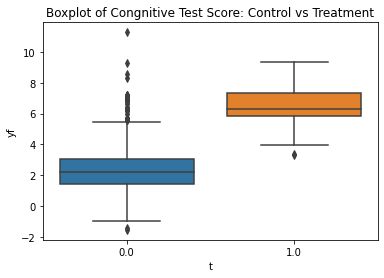

In [10]:
sns.boxplot(x='t', y='yf', data=df_ihdp)
plt.title('Boxplot of Congnitive Test Score: Control vs Treatment')
plt.show()

### JOBS Dataset

In [11]:
jobs = np.load('jobs.npz')
df_jobs = pd.DataFrame(jobs['x'])
# df_jobs.describe()

In [12]:
df_jobs['t'] = jobs['t']
df_jobs['y'] = jobs['y']
df_jobs['e'] = jobs['e']
df_jobs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0,1,0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0,1,0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0,1,0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0,1,1
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,1.737976,1.805449,0.0,0.0,1.0,0.0,4.235839,-1.110467,1.887171,1.995900,2.113702,6.424008,-0.518815,0.0,1.0,5.197260,0.0,0,0,0
3208,-0.520192,0.101835,0.0,0.0,0.0,0.0,0.239950,0.289997,-0.583365,-0.608340,-0.022502,-0.094318,-0.063091,0.0,0.0,0.143774,0.0,0,1,0
3209,-0.802463,0.442558,1.0,0.0,0.0,0.0,0.124337,0.692182,-0.785284,-0.743407,0.345809,-0.168387,0.236242,0.0,0.0,0.135970,0.0,0,1,0
3210,0.702982,0.101835,0.0,0.0,1.0,0.0,0.341112,0.670636,0.566120,0.413295,-0.022502,-0.024223,0.218301,0.0,0.0,0.225715,0.0,0,1,0


In [14]:
np.unique(jobs['y'], return_counts=True)

(array([0, 1], dtype=uint8), array([ 482, 2730]))

In [15]:
np.corrcoef(df_jobs['t'], df_jobs['y'])

array([[ 1.        , -0.06750433],
       [-0.06750433,  1.        ]])

In [16]:
sub1 = df_jobs[df_jobs['t'] == 1]['y']
sum(sub1)/len(sub1)

0.7744107744107744

In [17]:
sub0 = df_jobs[df_jobs['t'] == 0]['y']
sum(sub0)/len(sub0)

0.8576329331046312

In [18]:
np.unique(jobs['e'], return_counts=True)

(array([0, 1], dtype=uint8), array([2490,  722]))

## Task 2
Select appropriate evaluation metrics for each dataset

### Mean Absolute Error
It is the average of the absolute difference between the estimated treatment effects and the actual treatments effects. This measure requires counter factual measurements, hence applicable to the IHDP dataset.

### Average Treatment Effect
This is average of the difference between treatment and control effects. This doesn't require counterfactual measurements, hence used for the JOBS dataset.

## Task 3: Simple Learners
We use linear regression for the IHDP dataset and logistic regression for the JOBS dataset.

### IHDP Dataset

In [19]:
from sklearn.linear_model import LinearRegression

In [27]:
X_ihdp = df_ihdp.iloc[:, :26].values
y_ihdp = df_ihdp.iloc[:, 26].values

In [28]:
# 3.b. Train a model 
reg = LinearRegression().fit(X_ihdp, y_ihdp)

In [33]:
# 3.c. Make effect predictions and compute relevant metrics
X_ihdp_copy = np.copy(X_ihdp)
X_ihdp_copy[:, -1] = 1
# make predictions for all treatments
y_ihdp_t = reg.predict(X_ihdp_copy)
# next set t=0
X_ihdp_copy[:, -1] = 0
# make predictions for controls
y_ihdp_c = reg.predict(X_ihdp_copy)
# get effect predictions
y_ihdp_effect = y_ihdp_t - y_ihdp_c

In [43]:
# calculate the MAE
ihdp_actual_effect = (df_ihdp['yf'].values - df_ihdp['ycf'].values) * (2*df_ihdp['t']-1)
ihdp_MAE = np.mean(np.abs(ihdp_actual_effect - y_ihdp_effect))
print('Mean Absolute Error = %.4f' % ihdp_MAE)

Mean Absolute Error = 1.2655


In [48]:
# 3.d. Grid Search
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [57]:
params = {'alpha':[0, 0.01, 0.1, 1.0, 5, 10]}
ridge_reg = GridSearchCV(Ridge(), params)
ridge_reg.fit(X_ihdp, y_ihdp)
ridge_reg.best_estimator_

Ridge(alpha=5)

In [60]:
# 3.e. Cross validation
from sklearn.linear_model import RidgeCV

In [80]:
# define custom scoring function
# Mean Absolute Error of Effect
def mae_effect(estimator, X, y):
    x = np.copy(X)
    x[-1] = 1
    pred_t = estimator.predict(x)
    x[-1] = 0
    pred_c = estimator.predict(x)
    pred_effect = pred_t - pred_c
    mae = np.mean(np.abs(ihdp_actual_effect - pred_effect[0]))
    return mae

In [86]:
# 3.e. Cross validation
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 5, 10], scoring=mae_effect).fit(X_ihdp, y_ihdp)
print('Best alpha chosen: ', ridge.alpha_)

Best alpha chosen:  0.001


In [87]:
X_ihdp_copy[:, -1] = 1
# make predictions for all treatments
y_ihdp_t = ridge.predict(X_ihdp_copy)
# next set t=0
X_ihdp_copy[:, -1] = 0
# make predictions for controls
y_ihdp_c = ridge.predict(X_ihdp_copy)
# get effect predictions
y_ihdp_effect = y_ihdp_t - y_ihdp_c
ihdp_MAE = np.mean(np.abs(ihdp_actual_effect - y_ihdp_effect))
print('Mean Absolute Error = %.4f' % ihdp_MAE)

Mean Absolute Error = 1.2660


In [89]:
# 3.f: plot feature importance
import matplotlib.pyplot as plt

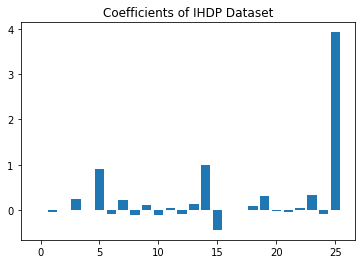

In [92]:
plt.bar(range(len(ridge.coef_)), ridge.coef_)
plt.title('Coefficients of IHDP Dataset')
plt.show()

### JOBS Dataset

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
X_jobs = df_jobs.iloc[:, :18].values
y_jobs = df_jobs.iloc[:, 18].values

In [100]:
clf = LogisticRegression(random_state=0)
clf.fit(X_jobs, y_jobs)

LogisticRegression(random_state=0)

In [105]:
# 3.c. obtain effects estimates
X_jobs_copy = np.copy(X_jobs)
X_jobs_copy[:, -1] = 1
# make predictions for all treatments
y_jobs_t = clf.predict(X_jobs_copy)
# next set t=0
X_jobs_copy[:, -1] = 0
# make predictions for controls
y_jobs_c = clf.predict(X_jobs_copy)
# get effect predictions
y_jobs_effect = y_jobs_t - y_jobs_c
jobs_ATE = np.mean(np.abs(y_jobs_effect))
print('Average Treatment Effect = %.4f' % jobs_ATE)

Average Treatment Effect = 0.0364


In [114]:
# 3.d & 3.e
params = {'C':[0.01, 0.1, 1.0, 5, 10]}
clf = GridSearchCV(LogisticRegression(random_state=0), params)
clf.fit(X_jobs, y_jobs)
clf.best_estimator_

LogisticRegression(C=0.1, random_state=0)

In [115]:
X_jobs_copy = np.copy(X_jobs)
X_jobs_copy[:, -1] = 1
# make predictions for all treatments
y_jobs_t = clf.best_estimator_.predict(X_jobs_copy)
# next set t=0
X_jobs_copy[:, -1] = 0
# make predictions for controls
y_jobs_c = clf.best_estimator_.predict(X_jobs_copy)
# get effect predictions
y_jobs_effect = y_jobs_t - y_jobs_c
jobs_ATE = np.mean(np.abs(y_jobs_effect))
print('Average Treatment Effect = %.4f' % jobs_ATE)

Average Treatment Effect = 0.0299


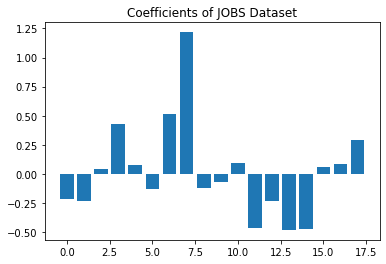

In [119]:
# 3.f
coef = clf.best_estimator_.coef_[0]
plt.bar(range(len(coef)), coef)
plt.title('Coefficients of JOBS Dataset')
plt.show()

## Task 4: Propensity score re-weighting


### IHDP Dataset

In [135]:
# 4.a. Train a classifier to predict propensity scores
X_prop_ihdp = X_ihdp[:,:-1]
y_prop_ihdp = X_ihdp[:,-1]
# logistic regression classifier
prop_clf = LogisticRegression(random_state=0)
prop_clf.fit(X_prop_ihdp, y_prop_ihdp)
# propensity scores
prop_scores = prop_clf.predict_proba(X_prop_ihdp)[:, 1]

In [137]:
# 4.b. create samples weights
def get_sample_weights(targets, prop_scores):
    weights = []
    for t, e in zip(targets, prop_scores):
        w = t/e + (1-t)/(1-e)
        weights.append(w)
    return weights
# get weights
weights = get_sample_weights(y_prop_ihdp, prop_scores)

In [140]:
# 4.c. Train a weighted regressor
w_reg = LinearRegression().fit(X_ihdp, y_ihdp, weights)
# Make effect predictions and compute relevant metrics
X_ihdp_copy = np.copy(X_ihdp)
X_ihdp_copy[:, -1] = 1
# make predictions for all treatments
y_ihdp_t = w_reg.predict(X_ihdp_copy)
# next set t=0
X_ihdp_copy[:, -1] = 0
# make predictions for controls
y_ihdp_c = w_reg.predict(X_ihdp_copy)
# get effect predictions
y_ihdp_effect = y_ihdp_t - y_ihdp_c
# calculate the MAE
ihdp_actual_effect = (df_ihdp['yf'].values - df_ihdp['ycf'].values) * (2*df_ihdp['t']-1)
ihdp_MAE = np.mean(np.abs(ihdp_actual_effect - y_ihdp_effect))
print('Mean Absolute Error = %.4f' % ihdp_MAE)

Mean Absolute Error = 1.2613


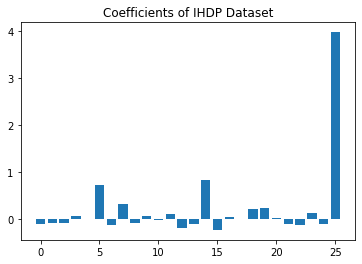

In [141]:
plt.bar(range(len(w_reg.coef_)), w_reg.coef_)
plt.title('Coefficients of IHDP Dataset')
plt.show()

### JOBS Dataset

In [144]:
# 4.a. Train a classifier to predict propensity scores
X_prop_jobs = X_jobs[:,:-1]
y_prop_jobs = X_jobs[:,-1]
# logistic regression classifier
prop_clf = LogisticRegression(random_state=0)
prop_clf.fit(X_prop_jobs, y_prop_jobs)
# propensity scores
prop_scores = prop_clf.predict_proba(X_prop_jobs)[:, 1]

In [145]:
# get weights
weights = get_sample_weights(y_prop_jobs, prop_scores)

In [147]:
w_clf = LogisticRegression(random_state=0)
w_clf.fit(X_jobs, y_jobs, weights)

LogisticRegression(random_state=0)

In [166]:
# obtain effects estimates
X_jobs_copy = np.copy(X_jobs)
X_jobs_copy[:, -1] = 1
# make predictions for all treatments
y_jobs_t = w_clf.predict(X_jobs_copy)
# next set t=0
X_jobs_copy[:, -1] = 0
# make predictions for controls
y_jobs_c = w_clf.predict(X_jobs_copy)
# get effect predictions
y_jobs_effect = y_jobs_t - y_jobs_c
jobs_ATE = np.mean(y_jobs_effect)
print('Average Treatment Effect = %.4f' % jobs_ATE)

Average Treatment Effect = 0.0377


## Task 5: Advanced CATE estimators

### IHDP Dataset

In [155]:
X_ihdp_CATE = X_ihdp[:, :-1]
T_ihdp_CATE = X_ihdp[:, -1]

In [157]:
# !pip install econml==0.10.0
import econml
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV
# Use defaults
est = CausalForestDML()
# Or specify hyperparameters
est = CausalForestDML(criterion='het', n_estimators=500,       
                      min_samples_leaf=10, 
                      max_depth=10, max_samples=0.4,
                      discrete_treatment=False,
                      model_t=LassoCV(), model_y=LassoCV())
est.fit(y_ihdp, T_ihdp_CATE, X=X_ihdp_CATE)
treatment_effects = est.effect(X_ihdp_CATE)
# Confidence intervals via Bootstrap-of-Little-Bags for forests
lb, ub = est.effect_interval(X_ihdp_CATE, alpha=0.05)

In [161]:
# calculate the MAE
ihdp_actual_effect = (df_ihdp['yf'].values - df_ihdp['ycf'].values) * (2*df_ihdp['t']-1)
ihdp_MAE_CATE = np.mean(np.abs(ihdp_actual_effect - treatment_effects))
print('Mean Absolute Error = %.4f' % ihdp_MAE_CATE)

Mean Absolute Error = 1.1707


### JOBS Dataset

In [162]:
X_jobs_CATE = X_jobs[:, :-1]
T_jobs_CATE = X_jobs[:, -1]

In [163]:
# Use defaults
est = CausalForestDML()
# Or specify hyperparameters
est = CausalForestDML(criterion='het', n_estimators=500,       
                      min_samples_leaf=10, 
                      max_depth=10, max_samples=0.4,
                      discrete_treatment=False,
                      model_t=LassoCV(), model_y=LassoCV())
est.fit(y_jobs, T_jobs_CATE, X=X_jobs_CATE)
treatment_effects = est.effect(X_jobs_CATE)
# Confidence intervals via Bootstrap-of-Little-Bags for forests
lb, ub = est.effect_interval(X_jobs_CATE, alpha=0.05)

In [165]:
jobs_ATE_CATE = np.mean(treatment_effects)
print('Average Treatment Effect = %.4f' % jobs_ATE_CATE)

Average Treatment Effect = -0.0409
